# LinkedIn Job Postings Data Analysis Report

In this report, we conduct a comprehensive analysis of the LinkedIn Job Postings dataset, aiming to derive valuable insights into salaries, top companies, and marketing trends. The analysis encompasses data cleaning, salary exploration, and marketing insights, providing a holistic view of the job postings landscape. Let's delve into the key findings and observations from our exploration.

### LinkedInJobs_MLDataset Data Dictionary 

- Co_Nm / Company Name, dType Object
- Co_Pg_Lstd / Company Page Listed, dType Bool
- Emp_Cnt / Company Employee Count, dType int64
- Flw_Cnt / Company Follower Count, dType int64
- Job_Ttl / Job Title, dType Object
- Job_Desc / Job Description, dtype Object
- Is_Supvsr / Is Post a Supervisor Position (Calculated), dType Bool
- max_sal / Maximum Salary, dtype Float64
- med_sal / Median Salary, dtype Float64
- min_sal / Minimum Salary, dtype Float64
- py_prd / Pay Period, dtype Category {Not Listed, YEARLY, HOURLY, MONTHLY, Unpaid, WEEKLY, ONCE}
- py_lstd / Pay Listed (Calculated), dtype Bool 
- wrk_typ / Work Type, dtype Category {Full-time, Contract, Part-time, Temporary, Internship, Other, Volunteer}
- loc / Job Location, dtype Object
- st_code / Job State Code (Calculated), dtype Object
- is_remote / Is Job Remote (Calculated), dtype Bool
- views / Number of Posting Views, dtype int64
- app_typ / Application Type, dtype Category {Offsite Apply, SimpleOnSiteApply, ComplexOnSiteApply}
- app_is_off / Is Application Offsite (Calculated), dtype Bool
- xp_lvl / Experience Level, dtype Category {Mid-Senior level, Not Listed, Entry level, Associate, Director, Internship, Executive}
- domain / Posting Domain, dtype Object
- has_post_domain / Has Posting Domain (Calculated), dtype Bool
- is_sponsored / Is Sponsored, dtype Bool
- base_comp / Has Base Compensation, dtype Bool

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Reading LinkedInJobs dataset
df=pd.read_csv(r"/kaggle/input/linkedin-jobs-machine-learning-data-set/LinkedInJobs_MLDataset.csv",sep=",")

In [3]:
df.shape

(33246, 24)

In [4]:
df.columns

Index(['Co_Nm', 'Co_Pg_Lstd', 'Emp_Cnt', 'Flw_Cnt', 'Job_Ttl', 'Job_Desc',
       'Is_Supvsr', 'max_sal', 'med_sal', 'min_sal', 'py_prd', 'py_lstd',
       'wrk_typ', 'loc', 'st_code', 'is_remote', 'views', 'app_typ',
       'app_is_off', 'xp_lvl', 'domain', 'has_post_domain', 'is_sponsored',
       'base_comp'],
      dtype='object')

## Data Cleaning

In [5]:
# Drop the specified columns
columns_to_drop = ['Co_Pg_Lstd','Job_Desc','has_post_domain','py_lstd', 'app_is_off','domain']
df = df.drop(columns=columns_to_drop, axis=1)

In [6]:
df.isnull().sum()

Co_Nm           4
Emp_Cnt         0
Flw_Cnt         0
Job_Ttl         0
Is_Supvsr       0
max_sal         0
med_sal         0
min_sal         0
py_prd          0
wrk_typ         0
loc             0
st_code         0
is_remote       0
views           0
app_typ         0
xp_lvl          0
is_sponsored    0
base_comp       0
dtype: int64

here we can see that we have null values at company name we will fill them with "no company name"

In [7]:
df['Co_Nm'].fillna('No Company Name',inplace=True)

In [8]:
df.isnull().sum()

Co_Nm           0
Emp_Cnt         0
Flw_Cnt         0
Job_Ttl         0
Is_Supvsr       0
max_sal         0
med_sal         0
min_sal         0
py_prd          0
wrk_typ         0
loc             0
st_code         0
is_remote       0
views           0
app_typ         0
xp_lvl          0
is_sponsored    0
base_comp       0
dtype: int64

now we need to check for duplicates

In [9]:
duplicates = df[df.duplicated()]
duplicates.shape

(193, 18)

so we have 193 duplicated row
Let's go ahead and drop these duplicate rows

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df[df.duplicated()].shape

(0, 18)

In [12]:
print("DataFrame Shape After Dropping Duplicates:", df.shape)

DataFrame Shape After Dropping Duplicates: (33053, 18)


In [13]:
df.head()

,Co_Nm,Emp_Cnt,Flw_Cnt,Job_Ttl,Is_Supvsr,max_sal,med_sal,min_sal,py_prd,wrk_typ,loc,st_code,is_remote,views,app_typ,xp_lvl,is_sponsored,base_comp
0,HearingLife,1171,11417,Hearing Care Provider,False,5250.00,5250.00,5250.00,MONTHLY,Full-time,"Little River, SC",SC,0,9,OffsiteApply,Entry level,0,1
1,"Metalcraft of Mayville, Inc.",300,2923,Shipping & Receiving Associate 2nd shift (Beav...,False,0.00,0.00,0.00,Not Listed,Full-time,"Beaver Dam, WI",WI,0,0,OffsiteApply,Not Listed,0,0
2,"U.S. Tsubaki Power Transmission, LLC",314,8487,"Manager, Engineering",True,0.00,0.00,0.00,Not Listed,Full-time,"Bessemer, AL",AL,0,0,OffsiteApply,Not Listed,0,0
3,Episcopal Communities & Services,36,305,Cook,False,22.27,22.27,22.27,HOURLY,Full-time,"Aliso Viejo, CA",CA,0,1,OffsiteApply,Entry level,0,1
4,"iHerb, LLC",1227,51933,Principal Cloud Security Architect (Remote),False,275834.00,240895.00,205956.00,YEARLY,Full-time,United States,XF,1,0,OffsiteApply,Mid-Senior level,0,1


In [14]:
#now let's validate the columns we have 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33053 entries, 0 to 33245
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Co_Nm         33053 non-null  object 
 1   Emp_Cnt       33053 non-null  int64  
 2   Flw_Cnt       33053 non-null  int64  
 3   Job_Ttl       33053 non-null  object 
 4   Is_Supvsr     33053 non-null  bool   
 5   max_sal       33053 non-null  float64
 6   med_sal       33053 non-null  float64
 7   min_sal       33053 non-null  float64
 8   py_prd        33053 non-null  object 
 9   wrk_typ       33053 non-null  object 
 10  loc           33053 non-null  object 
 11  st_code       33053 non-null  object 
 12  is_remote     33053 non-null  int64  
 13  views         33053 non-null  int64  
 14  app_typ       33053 non-null  object 
 15  xp_lvl        33053 non-null  object 
 16  is_sponsored  33053 non-null  int64  
 17  base_comp     33053 non-null  int64  
dtypes: bool(1), float64(3), int64(6

In [15]:
# Check unique values in boolean columns
boolean_columns = ['Is_Supvsr', 'is_sponsored', 'base_comp']

for col in boolean_columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")


Unique values in 'Is_Supvsr': [False  True]
Unique values in 'is_sponsored': [0 1]
Unique values in 'base_comp': [1 0]


In [16]:
# Check if max_sal is always greater than or equal to min_sal
invalid_salaries = df[df['max_sal'] < df['min_sal']]

# Display rows with invalid salary relationships (if any)
print("Rows with Invalid Salary Relationships:")
invalid_salaries.shape[0]

Rows with Invalid Salary Relationships:


0

In [17]:
# Check for negative values in numerical columns
numerical_columns = ['Emp_Cnt', 'Flw_Cnt', 'max_sal', 'med_sal', 'min_sal', 'views']

for col in numerical_columns:
    negative_values = df[df[col] < 0]
    
    if not negative_values.empty:
        print(f"Rows with negative values in '{col}':")
        print(negative_values)
    else:
        print(f"No negative values found in '{col}'.")


No negative values found in 'Emp_Cnt'.
No negative values found in 'Flw_Cnt'.
No negative values found in 'max_sal'.
No negative values found in 'med_sal'.
No negative values found in 'min_sal'.
No negative values found in 'views'.


## Salary Analysis

In [18]:
df.describe()

,Emp_Cnt,Flw_Cnt,max_sal,med_sal,min_sal,is_remote,views,is_sponsored,base_comp
count,33053.000000,3.305300e+04,3.305300e+04,3.305300e+04,33053.000000,33053.000000,33053.000000,33053.000000,33053.000000
mean,15516.155054,5.258622e+05,3.197518e+04,2.759430e+04,23213.425817,0.145161,45.685233,0.244758,0.401960
std,62349.701906,2.716403e+06,6.835578e+04,5.800637e+04,49063.699410,0.352268,127.296793,0.429950,0.490301
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147.000000,8.135000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000
50%,1229.000000,3.786300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,8.000000,0.000000,0.000000
75%,8114.000000,1.687680e+05,1.000000e+02,9.250000e+01,85.000000,0.000000,38.000000,0.000000,1.000000
max,829111.000000,3.188720e+07,1.300000e+06,1.050000e+06,998426.000000,1.000000,5656.000000,1.000000,1.000000


#### top 10 job titles with the highest average salaries

In [19]:
df['avg_sal'] = (df['max_sal'] +df['med_sal']+ df['min_sal']) / 3

In [20]:
jobs = df.groupby('Job_Ttl')['avg_sal'].mean()
jobs.sort_values(ascending=False).head(10)

Job_Ttl
Quantitative Developer                                               1050000.0
Criminal Court Clerk                                                  998426.0
Tech Lead Manager (L6-L8) | Disruptive FinTech                        875000.0
Fintech Startup | Tech Lead Manager - Software Engineer               800000.0
Distinguished Engineer, Trilogy (Remote) - $800,000/year USD          800000.0
Chief Software Architect, Trilogy (Remote) - $800,000/year USD        800000.0
Head of Sales & Marketing (Healthcare)                                800000.0
Registered Nurse or Licensed Practical Nurse - RN or LPN - School     785358.0
Director of Product, MyBSWHealth                                      750000.0
Urologist                                                             700000.0
Name: avg_sal, dtype: float64

#### Top 10 companies that have the highest number of job postings?

In [21]:
# Filter out rows where there is no company page
pages = df[df['Co_Nm']!='No Company Page']
top_companies = pages['Co_Nm'].value_counts().head(10)
top_companies

Co_Nm
Insight Global             217
City Lifestyle             198
CareerStaff Unlimited      181
Aya Healthcare             166
Verizon                    154
Vivian Health              142
Jobot                      125
Fusion Medical Staffing    121
Cogent Communications      107
Google                     107
Name: count, dtype: int64

#### what is the average salary of Google job postings

In [22]:
# Filter rows where the company name is 'Google'
google_jobs = df[df['Co_Nm'] == 'Google']

# Calculate the average salary for Google job postings
google_jobs['avg_sal'].mean()

192560.7476635514

#### Determine the most common job titles at Google

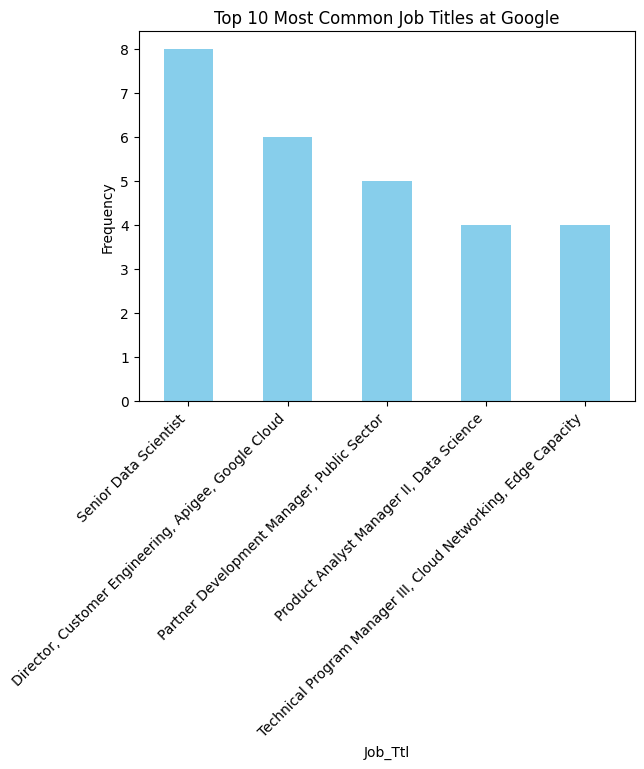

In [23]:
# Get the most common job titles
common_job_titles = google_jobs['Job_Ttl'].value_counts().head(5)

# Plot a bar chart
common_job_titles.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Common Job Titles at Google')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### What is the distribution of salaries for Google job postings?

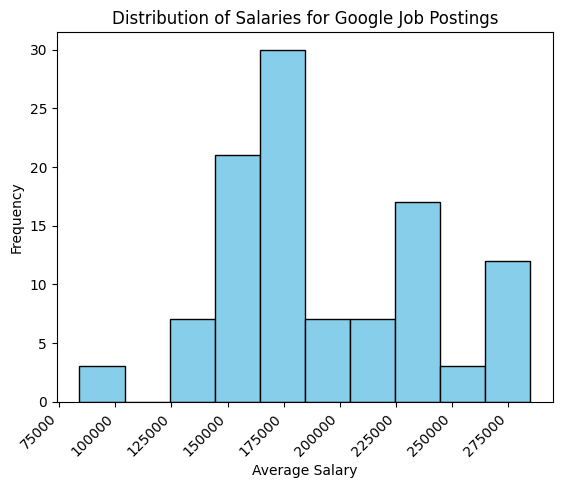

In [24]:
plt.hist(google_jobs['avg_sal'], color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries for Google Job Postings')
plt.xlabel('Average Salary')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### What is the Distribution of experience level requested by Google in job postings?

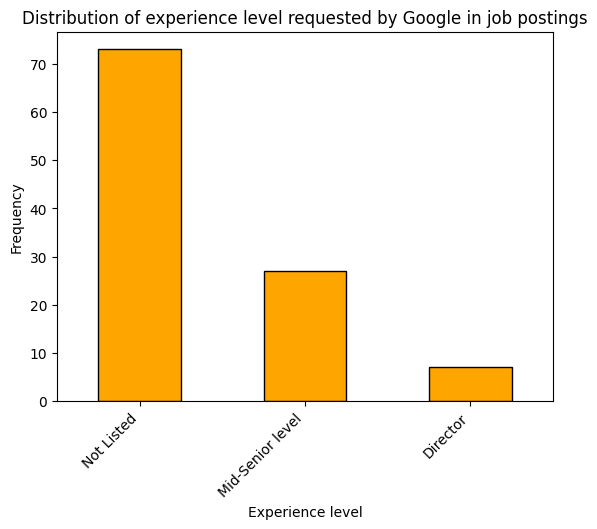

In [25]:
avg_xp_lvl =google_jobs['xp_lvl'].value_counts()
avg_xp_lvl.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Distribution of experience level requested by Google in job postings')
plt.xlabel('Experience level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

#### what are the work types for Google job postings

In [26]:
work_type_counts = google_jobs['wrk_typ'].value_counts()
work_type_counts

wrk_typ
Full-time    107
Name: count, dtype: int64

#### How does the average salary vary across different job types (Experience Levels) and Pay Periods?

In [27]:
pivot_table = pd.pivot_table(df, values='avg_sal', index='xp_lvl', columns='py_prd', margins=True, margins_name='Total')
pivot_table

py_prd,HOURLY,MONTHLY,Not Listed,ONCE,Unpaid,WEEKLY,YEARLY,Total
xp_lvl,,,,,,,,
Associate,33.204567,6106.990000,0.0,NaN,0.0,NaN,94077.181175,25765.707289
Director,8737.765179,3796.500000,0.0,NaN,NaN,NaN,170814.844779,68841.385004
Entry level,52.882214,4586.530769,0.0,NaN,0.0,1642.212121,86210.242839,11801.593622
Executive,91.843571,10467.000000,0.0,NaN,0.0,NaN,184566.489231,71307.036469
Internship,27.107475,9340.000000,0.0,NaN,0.0,NaN,82285.131579,4102.852487
Mid-Senior level,46.567949,7396.825000,0.0,68.0,0.0,2161.590909,120079.452834,35506.529619
Not Listed,35.403930,4960.599797,0.0,NaN,0.0,NaN,107749.840009,25563.638910
Total,92.780397,5621.300757,0.0,68.0,0.0,1939.000000,113993.158160,27594.304552


#### What is the average salary for different work types across different experience levels?

In [28]:
pivot_result = df.pivot_table(index='xp_lvl', columns='wrk_typ', values='avg_sal')
pivot_result

wrk_typ,Contract,Full-time,Internship,Other,Part-time,Temporary,Volunteer
xp_lvl,,,,,,,
Associate,3025.165318,30951.142600,0.000000,0.000000,2891.280738,4050.793462,0.0
Director,28047.879310,69560.540869,73000.000000,130641.000000,105902.755000,56666.666667,NaN
Entry level,6162.359085,13692.950604,7.356500,13229.674348,635.947684,4923.713714,NaN
Executive,83.750000,75423.806737,NaN,109277.500000,0.000000,33.032500,0.0
Internship,18.000000,6327.941100,1576.132381,0.000000,1428.986447,3.187500,NaN
Mid-Senior level,3864.832248,42797.930351,44917.258500,56701.314815,4653.150015,15891.299359,0.0
Not Listed,3208.621645,32070.552124,2973.638158,2884.667273,1734.816379,2015.386972,0.0


## Marketing Insights:

#### What is the estimated ratio of views for sponsored posts compared to non-sponsored posts

In [29]:
views_comparison = df.groupby(['is_sponsored'])['views'].mean()
views_ratio = views_comparison.loc[1] / views_comparison.loc[0]

print(f"Sponsored posts = {views_ratio:.2f} * non-sponsored posts")

Sponsored posts = 1.53 * non-sponsored posts


#### compare the views per post to the number of followers

In [30]:
# Create a new DataFrame with 'Co_Nm', 'views', and 'Flw_Cnt'
views_followers_df = df[['Co_Nm', 'views', 'Flw_Cnt']].copy()

# Drop rows where 'Flw_Cnt' is 0 to avoid division by zero
views_followers_df = views_followers_df[views_followers_df['Flw_Cnt'] != 0]

# Calculate views per follower and add it to the DataFrame
views_followers_df['views_per_follower'] = views_followers_df['views'] / views_followers_df['Flw_Cnt']
views_followers_df

,Co_Nm,views,Flw_Cnt,views_per_follower
0,HearingLife,9,11417,0.000788
1,"Metalcraft of Mayville, Inc.",0,2923,0.000000
2,"U.S. Tsubaki Power Transmission, LLC",0,8487,0.000000
3,Episcopal Communities & Services,1,305,0.003279
4,"iHerb, LLC",0,51933,0.000000
...,...,...,...,...
33241,Crowe,2,134126,0.000015
33242,"Anders Group, LLC",0,6051,0.000000
33243,Crowe,0,134126,0.000000
33244,"Anders Group, LLC",0,6051,0.000000


#### Top searched job based on number of views 

In [31]:
top_searched_job = pages.sort_values(by='views', ascending=False).head(10)
top_searched_job['Job_Ttl']


24096                             Customer Success Manager
31932                             Junior Software Engineer
24312                                      President / CEO
27383                                       Vice President
27243                                  Executive Assistant
23852                      Customer Service Representative
14008                   Director of Information Technology
30990    Global Vice President, Channel Sales & Partner...
22091                           Talent Acquisition Manager
22408               Manager, Workforce Management (Remote)
Name: Job_Ttl, dtype: object

#### Display details of the most followed company

In [32]:
most_followed = pages.nlargest(1, 'Flw_Cnt')

most_followed[['Co_Nm', 'Flw_Cnt', 'avg_sal']]


,Co_Nm,Flw_Cnt,avg_sal
4824,Amazon,31887198,156150.0


#### investigate how different application types correlate with the number of views

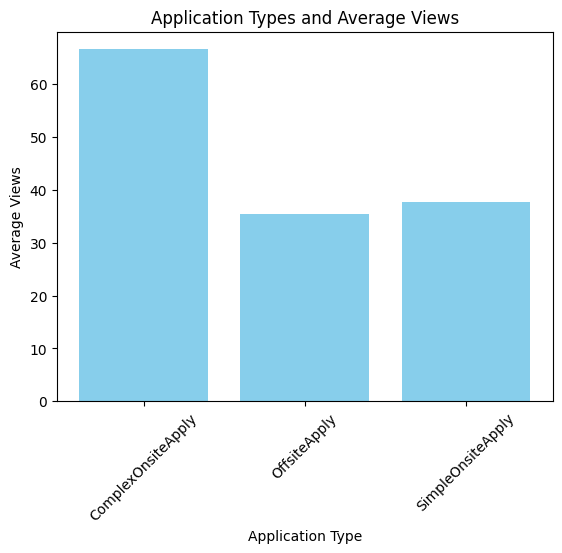

In [33]:
mean_views = df.groupby('app_typ')['views'].mean().reset_index()
mean_views

plt.bar(mean_views['app_typ'], mean_views['views'], color='skyblue')
plt.title('Application Types and Average Views')
plt.xlabel('Application Type')
plt.ylabel('Average Views')
plt.xticks(rotation=45)
plt.show()


# LinkedIn Job Postings Data Analysis Summary

### 1. **Data Cleaning:**
   - Dropped unnecessary columns, ensuring data relevance.
   - Filled null values in the 'Co_Nm' column with "No Company Name."
   - Checked for and removed duplicate rows.
   - Verified data integrity, handling negative values, and ensuring valid salary relationships.

### 2. **Salary Analysis:**
   - Calculated 'avg_sal' based on maximum, median, and minimum salaries.
   - Identified top 10 job titles with the highest average salaries.
   - Explored salary distribution for Google job postings.
   - Analyzed experience level distribution at Google.
   - Investigated work types for Google job postings.
   - Utilized pivot tables to explore salary across different job types and pay periods.

### 3. **Marketing Insights:**
   - Estimated the ratio of views for sponsored vs. non-sponsored posts.
   - Explored correlation between views per post and number of followers.
   - Identified top-searched job based on views.
   - Displayed details of the most followed company.
   - Explored correlation between application types and number of views.
   - Visualized relationship between application types and average views.

**Conclusion:** This analysis delves into the LinkedIn Job Postings dataset, offering a detailed exploration of salaries, top companies, and marketing insights. It provides valuable information for human resources decisions and marketing strategies.